# MNIST Important Pixels
In this notebook a simple feedforward network is built to recognise MNIST images, using Keras. <br> We then try to identify important pixels in the prediction for a given image.

## Part 1: Build the model

### Import libraries

In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Import MNIST data from TensorFlow

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Import Keras 

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


### Define model structure

In [3]:
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [4]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Train model

In [6]:
print("training start:", str(datetime.now()))
model.fit(mnist.train.images, 
          mnist.train.labels, 
          epochs = 10, 
          batch_size = 32,
          validation_data = (mnist.validation.images, mnist.validation.labels))
print("training end:", str(datetime.now()))

training start: 2018-01-10 17:53:17.144182
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 38us/step - loss: 0.3620 - acc: 0.8997 - val_loss: 0.2237 - val_acc: 0.9364
Epoch 2/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.2140 - acc: 0.9381 - val_loss: 0.1787 - val_acc: 0.9498
Epoch 3/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.1777 - acc: 0.9496 - val_loss: 0.1620 - val_acc: 0.9524
Epoch 4/10
55000/55000 [==============================] - 2s 34us/step - loss: 0.1562 - acc: 0.9560 - val_loss: 0.1542 - val_acc: 0.9534
Epoch 5/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.1396 - acc: 0.9598 - val_loss: 0.1464 - val_acc: 0.9582
Epoch 6/10
55000/55000 [==============================] - 2s 34us/step - loss: 0.1291 - acc: 0.9628 - val_loss: 0.1323 - val_acc: 0.9626
Epoch 7/10
55000/55000 [==============================] - 2s 33us/step - loss: 0.1175 

In [128]:
train_preds = model.predict(mnist.train.images)
train_preds.shape

(55000, 10)

### Check model layers

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.get_layer("dense_1").get_weights()[0].shape

(784, 32)

In [11]:
model.get_layer("dense_1").get_weights()[1].shape

(32,)

In [12]:
model.get_layer("dense_2").get_weights()[0].shape

(32, 10)

In [13]:
model.get_layer("dense_2").get_weights()[1].shape

(10,)

## Part 2: Find important pixels for the predicted value of a given image

### Choose image to consider
For the first row of training data, plot the image (7) and get the predictions from the model. <br> Predicted probability for class 7 = 93%.

In [49]:
row_number = 0

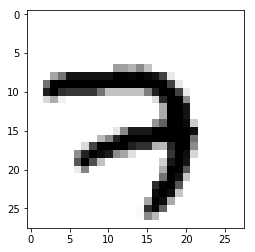

In [109]:
plt.imshow(1 - mnist.train.images[0,].reshape(28, 28), cmap='gray')

In [129]:
print(mnist.train.labels[row_number])
print("label:" , np.dot(mnist.train.labels[row_number], np.arange(10)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label: 7.0


In [131]:
np.round(train_preds[row_number], 2)

array([0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  , 0.93, 0.  , 0.  ],
      dtype=float32)

### Mulitply inputs (pixel values) by layer 1 weights 
For the first image, get pixel value * weight for each node (32) in layer 1.

In [57]:
def multiply_inputs_coefs(inputs, coefs):
    print("inputs shape:", inputs.shape)
    print("coefs shape:", coefs.shape)
    outputs = np.multiply(inputs, coefs)
    print("outputs shape:", outputs.shape)
    return(outputs)

In [58]:
input_x_coef1 = multiply_inputs_coefs(mnist.train.images[row_number,],
                                      np.transpose(model.get_layer("dense_1").get_weights()[0]))

inputs shape: (784,)
coefs shape: (32, 784)
outputs shape: (32, 784)


### Get intermediate layer outputs
These will be needed in the next section.

In [ ]:
from keras.models import Model

In [37]:
layer_name = 'activation_1'
intermediate_layer_model = Model(inputs = model.input,
                                 outputs = model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(mnist.train.images)
intermediate_output.shape

(55000, 32)

### Multiply layer 1 outputs by layer 2 weights
Now multiply the outputs from the activation_1 layer with the weights from the second dense layer, for each node (10).

In [46]:
intermediate_output[0,].shape

(32,)

In [47]:
intermediate_output.shape

(55000, 32)

In [59]:
input_x_coef2 = multiply_inputs_coefs(intermediate_output[row_number,],
                                      np.transpose(model.get_layer("dense_2").get_weights()[0]))

inputs shape: (32,)
coefs shape: (10, 32)
outputs shape: (10, 32)


In [140]:
pd.set_option('display.max_columns', 20)
pd.DataFrame(input_x_coef2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.0,-9.635512,-0.0,0.511566,-3.863917,-0.0,-0.0,0.0,-0.0,-0.0,...,-2.703749,0.816451,0.0,0.0,-13.624946,-0.0,-0.292560,-0.0,-0.0,-0.0
1,0.0,2.125093,-0.0,-2.262531,-5.013208,-0.0,-0.0,-0.0,0.0,0.0,...,-3.006290,-2.941774,-0.0,0.0,0.091975,0.0,-0.408508,0.0,0.0,0.0
2,-0.0,4.882957,0.0,0.012448,0.862640,-0.0,-0.0,-0.0,-0.0,-0.0,...,-1.911152,-0.132131,0.0,0.0,1.497805,-0.0,-0.021082,-0.0,0.0,0.0
3,-0.0,-3.556261,0.0,-0.237114,-2.775565,-0.0,-0.0,-0.0,-0.0,-0.0,...,1.348504,-1.321098,-0.0,-0.0,4.380715,-0.0,-0.196869,0.0,-0.0,-0.0
4,-0.0,-5.216155,-0.0,-4.121832,1.026034,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.089106,-1.577839,0.0,-0.0,-10.415653,-0.0,0.080127,0.0,-0.0,-0.0
5,0.0,-2.862185,-0.0,-0.045770,-3.529841,0.0,0.0,0.0,-0.0,0.0,...,-0.664488,-0.236531,-0.0,-0.0,1.464464,-0.0,0.068978,0.0,-0.0,-0.0
6,-0.0,-4.459607,-0.0,-1.071114,0.025152,-0.0,-0.0,0.0,0.0,-0.0,...,0.389079,0.586401,-0.0,0.0,-16.067297,0.0,0.046557,-0.0,-0.0,-0.0
7,-0.0,0.681025,-0.0,0.453883,1.308520,-0.0,-0.0,-0.0,-0.0,0.0,...,-1.184131,0.509653,-0.0,-0.0,4.101708,-0.0,-0.250607,-0.0,-0.0,-0.0
8,-0.0,-0.786911,-0.0,-0.835756,-0.390771,0.0,-0.0,-0.0,-0.0,-0.0,...,0.779648,0.160527,-0.0,0.0,-2.319237,-0.0,-0.278729,-0.0,0.0,0.0
9,-0.0,-12.508745,-0.0,-0.881541,-0.212099,-0.0,-0.0,0.0,-0.0,-0.0,...,-2.499492,-0.630725,-0.0,-0.0,-6.891692,0.0,-0.034289,0.0,0.0,-0.0


### Sum inputs * weights by input for second layer

In [134]:
layer2_sum_input = np.sum(input_x_coef2, axis = 0)
layer2_sum_input

array([ 0.0000000e+00, -3.1336302e+01,  0.0000000e+00, -8.4777632e+00,
       -1.2563054e+01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -4.1109138e+01,
       -4.4498386e+00,  0.0000000e+00, -3.4090316e+00, -9.0752649e+00,
       -8.7471256e+00, -4.7755437e-03,  0.0000000e+00, -1.4600018e+01,
       -1.5514387e+01, -5.5626068e+00, -9.5411777e+00, -4.7670665e+00,
        0.0000000e+00,  0.0000000e+00, -3.7782158e+01,  0.0000000e+00,
       -1.2869811e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

### Multiply weights through network
value for pixel 1 = <br> input.weight(input1, node1) \* \[sum(input.weight(input1, node1), .., input.weight(input1, node10))\] + <br>
input.weight(input1, node2) \* \[sum(input.weight(input2, node1), .., input.weight(input2, node10))\] + <br>
input.weight(input1, node3) \* \[sum(input.weight(input3, node1), .., input.weight(input3, node10))\] + <br>
... <br>
input.weight(input1, node32) \* \[sum(input.weight(input32, node1), .., input.weight(input32, node10))\] <br>
Note, the inputs are nodes within the sum refer to second dense layer.

In [147]:
pixel_weight_network_sum = np.dot(layer2_sum_input, input_x_coef1)
pixel_weight_network_sum.shape

(784,)

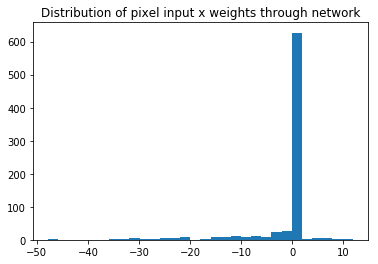

In [148]:
plt.title('Distribution of pixel input x weights through network')
a = plt.hist(pixel_weight_network_sum, bins=30)

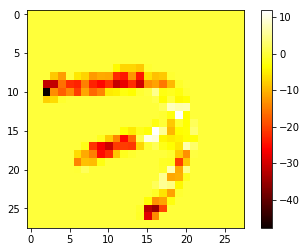

In [150]:
plt.imshow(pixel_weight_network_sum.reshape(28, 28), cmap='hot')
plt.colorbar()

This shows the product of input * weight through the network, starting at each pixel. <br>
However given that the background for the images is white, these zero values propagate through the network, and hence we are just highlighting the non-background (zero) pixels. <br> Need to test this on a different dataset where the background is not all one colour.

### Look at softmax transformation
First get output from second dense layer before going into the softmax function.

In [151]:
layer_name = 'dense_2'
intermediate_layer_model = Model(inputs = model.input,
                                 outputs = model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(mnist.train.images)
intermediate_output.shape

(55000, 10)

In [156]:
np.round(intermediate_output[0], 2)

array([-35.65, -28.33,  -5.15,  -1.95, -30.99, -18.99, -49.22,   0.62,
       -17.73, -21.83], dtype=float32)

In [153]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

In [155]:
np.round(softmax(intermediate_output[0]), 2)

array([0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  , 0.93, 0.  , 0.  ],
      dtype=float32)

The large negative values output from the second dense layer are transformed to 0 through the softmax function. <br> This is a multiclass classification problem. <br> Negative "network weights" are mainly highlighted in the image. <br> Should just consider the path through the network from the pixel to the predicted class **which is not what is done above**.